<img src="https://yt3.ggpht.com/ytc/AAUvwnio-piH0HXSdeca_OoBORhxGaLHnG9PfXurUQ0ojw=s900-c-k-c0x00ffffff-no-rj" style="height: 100px; width:100px;float: right;"/>

This tutorial is based on the video:

<a href="http://www.youtube.com/watch?feature=player_embedded&v=HtYxzt55-1w
" target="_blank"><img src="http://img.youtube.com/vi/HtYxzt55-1w/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="240" height="180" border="10" align="left"/></a>

In [74]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

## Visualizing the data

In [8]:
SA1 = gpd.read_file("data/Shapefiles_2/Study_Area_1.shp")
SA2 = gpd.read_file("data/Shapefiles_2/Study_Area_2.shp")
river = gpd.read_file("data/Shapefiles_2/river.shp")

SA1

desc                                           geometry
0  Study_Area_1  POLYGON ((101.44456 4.32501, 101.44529 4.33050...

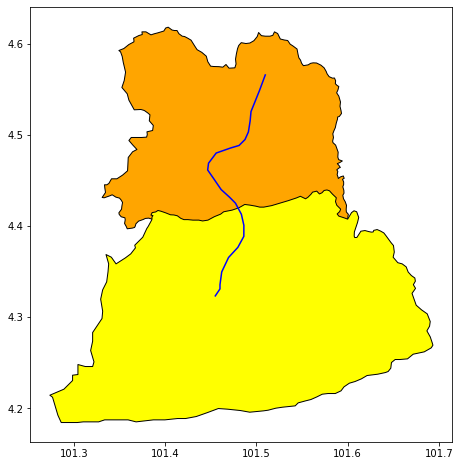

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
SA1.plot(ax=ax, color="orange", edgecolor="black")
SA2.plot(ax=ax, color="yellow", edgecolor="black")
river.plot(ax=ax, color="blue")
plt.show()

There is some common area between the two study areas: 

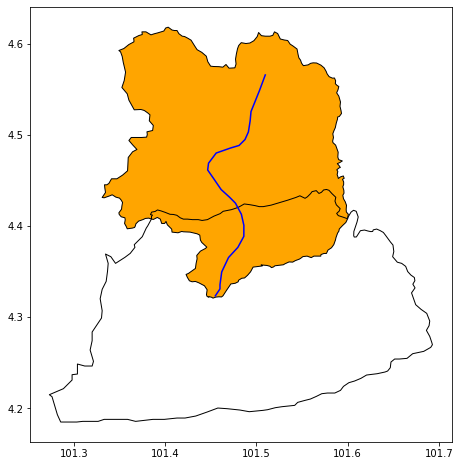

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
SA1.plot(ax=ax, color="orange", edgecolor="black")
SA2.plot(ax=ax, color="none", edgecolor="black")
river.plot(ax=ax, color="blue")
plt.show()

## Geoprocessing application in geopandas

- intersection
- union
- symmetric difference
- difference
- dissolve

### intersection

In [19]:
intersection = gpd.overlay(SA1, SA2, how="intersection")
intersection

desc_1        desc_2  \
0  Study_Area_1  Study_Area_2   

                                            geometry  
0  POLYGON ((101.44456 4.32501, 101.44529 4.33050...

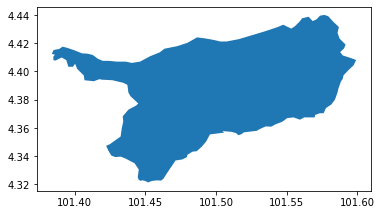

In [20]:
intersection.plot()
plt.show()

### Union 

Union of polygons

In [23]:
union = gpd.overlay(SA1, SA2, how="union")
union

desc_1        desc_2  \
0  Study_Area_1  Study_Area_2   
1  Study_Area_1           NaN   
2           NaN  Study_Area_2   

                                            geometry  
0  POLYGON ((101.44456 4.32501, 101.44529 4.33050...  
1  POLYGON ((101.38479 4.40801, 101.38479 4.40801...  
2  POLYGON ((101.38479 4.40764, 101.38479 4.40801...

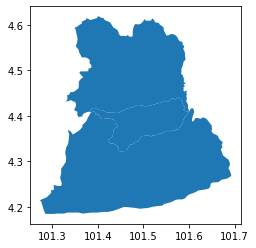

In [24]:
union.plot()
plt.show()

### Symmetric difference 

In [26]:
sd = gpd.overlay(SA1, SA2, how="symmetric_difference")
sd

desc_1        desc_2  \
0  Study_Area_1           NaN   
1           NaN  Study_Area_2   

                                            geometry  
0  POLYGON ((101.38479 4.40801, 101.38479 4.40801...  
1  POLYGON ((101.38479 4.40764, 101.38479 4.40801...

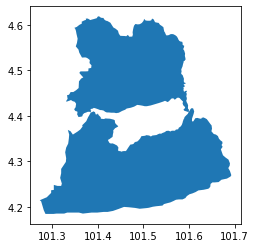

In [25]:
sd.plot()
plt.show()

### Difference

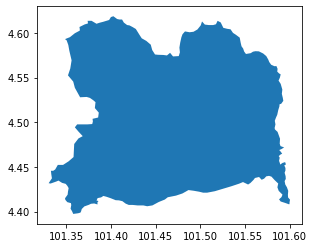

In [27]:
diff1 = gpd.overlay(SA1, SA2, how="difference")
diff1.plot()
plt.show()

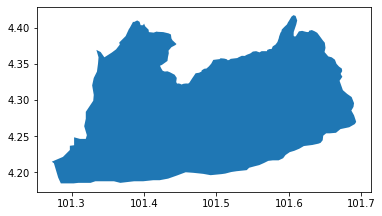

In [28]:
diff2 = gpd.overlay(SA2, SA1, how="difference")
diff2.plot()
plt.show()

This function finds out the difference between the two polygons excluding the common area and results into the remaining polygon. Here we can have the difference other way round by rearranging the geodataframe in the ```overlay()``` function

### Dissolve

 When we want to aggregate two polygons into one single one given that the polygons intersect:

In [31]:
common = union.copy()
common['area_code'] = 1
common

desc_1        desc_2  \
0  Study_Area_1  Study_Area_2   
1  Study_Area_1           NaN   
2           NaN  Study_Area_2   

                                            geometry  area_code  
0  POLYGON ((101.44456 4.32501, 101.44529 4.33050...          1  
1  POLYGON ((101.38479 4.40801, 101.38479 4.40801...          1  
2  POLYGON ((101.38479 4.40764, 101.38479 4.40801...          1

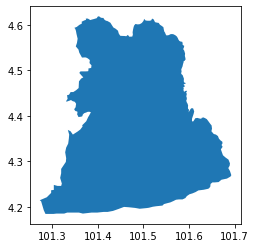

In [33]:
common = common.dissolve(by="area_code")
common.plot()
plt.show()

Dissolve makes multiple polygons into one single polygon:

In [34]:
common

geometry        desc_1  \
area_code                                                                    
1          POLYGON ((101.38479 4.40764, 101.38479 4.40801...  Study_Area_1   

                 desc_2  
area_code                
1          Study_Area_2

### Buffer

It is to make a polygon area around a given line by creating an offset from the line.

We will find the buffer area around the river shape file

Buffer operations are done mainly in meters. So we need to transform the crs to appropriate one like utm

In [35]:
river.crs

{'init': 'epsg:4326'}

**Converting WGS84 to UTM meters:** 

1. Get the utm zonal code using: [LatLong to UTM converter](https://www.latlong.net/lat-long-utm.html)
2. Then find the epsg code for the zone number: http://epsg.io/

Some important points of epsg code:
- First two digits corresponds to crs: like 32 is utm crs
- then the next digit represents N or S hemisphere: 6 - North and 7 - southern hemisphere
- And next two digits represents the zonal code in utm crs 

*Reference*:
- [How to find epsg code](https://youtu.be/gu3WMWTZpY4)
- [Coordinate system](https://www.youtube.com/watch?v=Z41Dt7_R180&t=1s)
- [Actual size of countries and continents](https://www.youtube.com/watch?v=KUF_Ckv8HbE)

In [53]:
river_projected = river.to_crs(epsg=24547)
river_projected

C:\Programdata\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


id                                           geometry
0   1  LINESTRING (778620.752 505214.942, 777899.429 ...

In [54]:
## providing a buffer of 5 kms around the river
buffer = river_projected.buffer(distance=500)
buffer

0    POLYGON ((778368.601 503084.213, 778363.668 50...
dtype: geometry

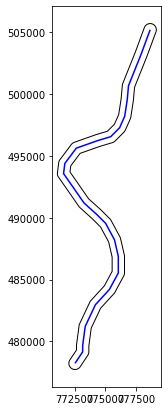

In [56]:
fig, ax = plt.subplots(figsize=(7,7))
river_projected.plot(ax=ax, color='blue')
buffer.plot(ax=ax, color='none', edgecolor='black')
plt.show()

### Centroids

How to obtain the centroid of closed geometry

In [61]:
centroids = union['geometry'].centroid
centroids

0    POINT (101.50244 4.38742)
1    POINT (101.46645 4.50626)
2    POINT (101.48432 4.28571)
dtype: geometry

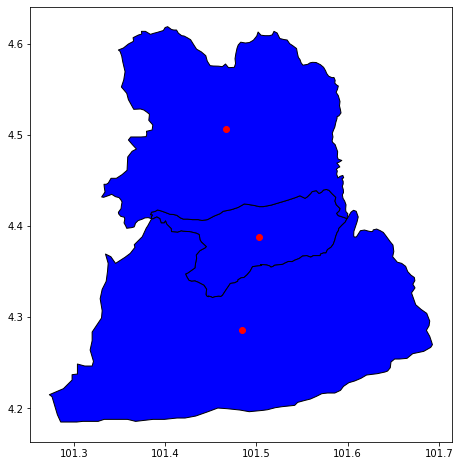

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
union.plot(ax=ax, color="blue", edgecolor="black")
centroids.plot(ax=ax, color="red")
plt.show()

## Converting csv to geopandas dataframe

In [73]:
df = pd.read_csv("data/Shapefiles_2/us_airports.csv")
df

IATA                              AIRPORT                            CITY  \
0    ABQ            Albuquerque International                     Albuquerque   
1    ANC  Ted Stevens Anchorage International                       Anchorage   
2    ATL    William B Hartsfield-Atlanta Intl                         Atlanta   
3    AUS       Austin-Bergstrom International                          Austin   
4    BDL                Bradley International                   Windsor Locks   
..   ...                                  ...                             ...   
335  WRG                             Wrangell                        Wrangell   
336  WYS                          Yellowstone                West Yellowstone   
337  XNA          Northwest Arkansas Regional  Fayetteville Springdale Rogers   
338  YAK                              Yakutat                         Yakutat   
339  YUM         Yuma MCAS-Yuma International                            Yuma   

    STATE COUNTRY   LATITUDE   LONGITUDE  
0      NM     USA  35.040222 -106.609194  
1      AK     USA  61.174320 -149.996186  
2      GA     USA  33.640444  -84.426944  
3      TX     USA  30.194533  -97.669872  
4      CT     USA  41.938874  -72.683228  
..    ...     ...        ...         ...  
335    AK     USA  56.484326 -132.369824  
336    MT     USA  44.688399 -111.117638  
337    AR     USA  36.281869  -94.306811  
338    AK     USA  59.503361 -139.660226  
339    AZ     USA  32.656583 -114.605972  

[340 rows x 7 columns]

Here we are going to convert the latitude and longitude to ```shapely.geometry.Point``` objects

In [100]:
geometry = [Point(x,y) for x,y in df[["LONGITUDE", "LATITUDE"]].values]
geometry[0:5]

Before converting to geopandas dataframe, we need to know the crs of the data. for that we will load the USA shape file and check the epsg code for the crs used:

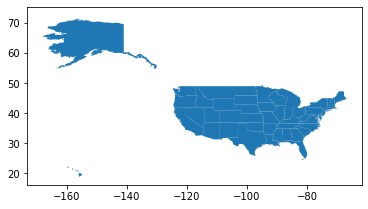

In [127]:
usa = gpd.read_file("data/Shapefiles_2/us_states.shp")
usa.plot()
plt.show()

In [102]:
crs = usa.crs
crs

{'init': 'epsg:4326'}

In [103]:
us_airports = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)
us_airports.head()

IATA                              AIRPORT           CITY STATE COUNTRY  \
0  ABQ            Albuquerque International    Albuquerque    NM     USA   
1  ANC  Ted Stevens Anchorage International      Anchorage    AK     USA   
2  ATL    William B Hartsfield-Atlanta Intl        Atlanta    GA     USA   
3  AUS       Austin-Bergstrom International         Austin    TX     USA   
4  BDL                Bradley International  Windsor Locks    CT     USA   

    LATITUDE   LONGITUDE                     geometry  
0  35.040222 -106.609194  POINT (-106.60919 35.04022)  
1  61.174320 -149.996186  POINT (-149.99619 61.17432)  
2  33.640444  -84.426944   POINT (-84.42694 33.64044)  
3  30.194533  -97.669872   POINT (-97.66987 30.19453)  
4  41.938874  -72.683228   POINT (-72.68323 41.93887)

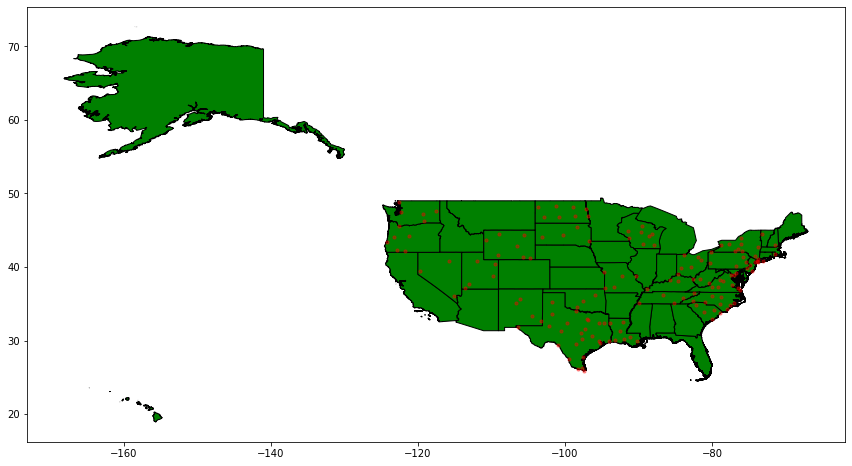

In [115]:
fig,ax = plt.subplots(figsize=(15,8))
usa.plot(ax=ax, color="green", edgecolor="black")
us_airports.plot(ax=ax, color="red", alpha=0.4, markersize=10)
plt.show()

## Attribute joins

How to do join operations on geopandas dataframe:

In [110]:
state_codes = pd.read_csv("data/Shapefiles_2/state names and codes.csv")
state_codes.sample(5)

state_name state_code
32    New York         NY
5     Colorado        CO 
43       Texas         TX
31  New Mexico         NM
26     Montana        MT

In our geopandas dataframe, we dont have the full state name, only we have the state code. In this exercise we will do a join operation by joining this above dataframe, and populate the statename in our geopandas df:

In [108]:
us_airports.head()

IATA                              AIRPORT           CITY STATE COUNTRY  \
0  ABQ            Albuquerque International    Albuquerque    NM     USA   
1  ANC  Ted Stevens Anchorage International      Anchorage    AK     USA   
2  ATL    William B Hartsfield-Atlanta Intl        Atlanta    GA     USA   
3  AUS       Austin-Bergstrom International         Austin    TX     USA   
4  BDL                Bradley International  Windsor Locks    CT     USA   

    LATITUDE   LONGITUDE                     geometry  
0  35.040222 -106.609194  POINT (-106.60919 35.04022)  
1  61.174320 -149.996186  POINT (-149.99619 61.17432)  
2  33.640444  -84.426944   POINT (-84.42694 33.64044)  
3  30.194533  -97.669872   POINT (-97.66987 30.19453)  
4  41.938874  -72.683228   POINT (-72.68323 41.93887)

For doing the join operations, we will have to have same column name where we will be performing join operations on;

here STATE needs to be changed to "state_code". or vice-versa:

In [109]:
us_airports.rename(columns={"STATE":"state_code"}, inplace=True)
us_airports.head(3)

IATA                              AIRPORT         CITY state_code COUNTRY  \
0  ABQ            Albuquerque International  Albuquerque         NM     USA   
1  ANC  Ted Stevens Anchorage International    Anchorage         AK     USA   
2  ATL    William B Hartsfield-Atlanta Intl      Atlanta         GA     USA   

    LATITUDE   LONGITUDE                     geometry  
0  35.040222 -106.609194  POINT (-106.60919 35.04022)  
1  61.174320 -149.996186  POINT (-149.99619 61.17432)  
2  33.640444  -84.426944   POINT (-84.42694 33.64044)

In [111]:
us_airports = us_airports.merge(state_codes, on="state_code")
us_airports.sample(10)

IATA                               AIRPORT             CITY state_code  \
20   GRK                       Robert Gray AAF          Killeen         TX   
74   CHO            Charlottesville-Albermarle  Charlottesville         VA   
136  DIK                   Dickinson Municipal        Dickinson         ND   
149  LAR                      Laramie Regional          Laramie         WY   
2    ROW         Roswell Industrial Air Center          Roswell         NM   
27   SPS  Sheppard AFB Wichita Falls Municipal    Wichita Falls         TX   
86   STL        Lambert-St Louis International         St Louis         MO   
104  SHV                   Shreveport Regional       Shreveport         LA   
48   CHS          Charleston AFB International       Charleston         SC   
95   LSE                   La Crosse Municipal        La Crosse         WI   

    COUNTRY   LATITUDE   LONGITUDE                     geometry  \
20      USA  31.064898  -97.827798   POINT (-97.82780 31.06490)   
74      USA  38.138639  -78.452861   POINT (-78.45286 38.13864)   
136     USA  46.797389 -102.801953  POINT (-102.80195 46.79739)   
149     USA  41.312050 -105.674986  POINT (-105.67499 41.31205)   
2       USA  33.301556 -104.530556  POINT (-104.53056 33.30156)   
27      USA  33.988796  -98.491893   POINT (-98.49189 33.98880)   
86      USA  38.747687  -90.359990   POINT (-90.35999 38.74769)   
104     USA  32.446628  -93.825598   POINT (-93.82560 32.44663)   
48      USA  32.898646  -80.040506   POINT (-80.04051 32.89865)   
95      USA  43.879380  -91.256538   POINT (-91.25654 43.87938)   

         state_name  
20            Texas  
74         Virginia  
136    North Dakota  
149         Wyoming  
2        New Mexico  
27            Texas  
86         Missouri  
104       Louisiana  
48   South Carolina  
95        Wisconsin

## Spatial joins

Joins done based on spatial location/coordinates of the geometry. 

In [157]:
airports = us_airports[["AIRPORT","geometry"]].copy()
airports.sample(5)

AIRPORT                    geometry
8                  William P X  POINT (-95.27889 29.64542)
85   Kansas City International  POINT (-94.71391 39.29761)
138       Hector International  POINT (-96.81499 46.91935)
21        Valley International  POINT (-97.65439 26.22851)
28               Tyler Pounds   POINT (-95.40239 32.35414)

In [158]:
airports.columns

Index(['AIRPORT', 'geometry'], dtype='object')

Here we don't have any state name. We will try to populate it from another geopandas dataframe using spatial joins

In [159]:
usa.sample(3)

STATE                                           geometry
23      Minnesota  POLYGON ((-95.11090 49.36652, -95.10748 49.365...
9         Florida  MULTIPOLYGON (((-81.96347 24.52542, -81.96347 ...
21  Massachusetts  MULTIPOLYGON (((-70.81028 41.26167, -70.81000 ...

In [160]:
usa.rename(columns={"NAME_1":"STATE"}, inplace=True)

In [171]:
airports_new = gpd.sjoin(airports, usa, how="inner")
airports_new

AIRPORT                     geometry  index_right  \
0         Albuquerque International  POINT (-106.60919 35.04022)           31   
1               Lea County Regional  POINT (-103.21703 32.68753)           31   
2     Roswell Industrial Air Center  POINT (-104.53056 33.30156)           31   
3                Santa Fe Municipal  POINT (-106.08814 35.61678)           31   
4    Austin-Bergstrom International   POINT (-97.66987 30.19453)           43   
..                              ...                          ...          ...   
150  Rock Springs-Sweetwater County  POINT (-109.06519 41.59422)           50   
151                          Yeager   POINT (-81.59319 38.37315)           48   
152          Tri-State Walker-Long    POINT (-82.55803 38.36667)           48   
153               Greenbrier Valley   POINT (-80.39947 37.85831)           48   
154                      Manchester   POINT (-71.43706 42.93452)           29   

             STATE  
0       New Mexico  
1       New Mexico  
2       New Mexico  
3       New Mexico  
4            Texas  
..             ...  
150        Wyoming  
151  West Virginia  
152  West Virginia  
153  West Virginia  
154  New Hampshire  

[155 rows x 4 columns]

In [172]:
airports_new.drop("index_right", axis=1, inplace=True)
airports_new.sample(15)

AIRPORT                     geometry  \
90   General Mitchell International   POINT (-87.89658 42.94722)   
107         Lawton-Ft Sill Regional   POINT (-98.41664 34.56771)   
148                    Jackson Hole  POINT (-110.73774 43.60732)   
32              Tri-Cities Regional   POINT (-82.40742 36.47521)   
149                Laramie Regional  POINT (-105.67499 41.31205)   
80      Atlantic City International   POINT (-74.57717 39.45758)   
55            Akron-Canton Regional   POINT (-81.44247 40.91631)   
115        Pittsburgh International   POINT (-80.23287 40.49147)   
101           Lake Charles Regional   POINT (-93.22340 30.12610)   
60               Asheville Regional   POINT (-82.54181 35.43619)   
93         Chippewa Valley Regional   POINT (-91.48507 44.86526)   
112                 North Bend Muni  POINT (-124.24603 43.41714)   
1               Lea County Regional  POINT (-103.21703 32.68753)   
68                      Blue Grass    POINT (-84.60539 38.03697)   
103                 Monroe Regional   POINT (-92.03769 32.51087)   

              STATE  
90        Wisconsin  
107        Oklahoma  
148         Wyoming  
32        Tennessee  
149         Wyoming  
80       New Jersey  
55             Ohio  
115    Pennsylvania  
101       Louisiana  
60   North Carolina  
93        Wisconsin  
112          Oregon  
1        New Mexico  
68         Kentucky  
103       Louisiana